<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-on-text-data" data-toc-modified-id="Classification-on-text-data-1">Classification on text data</a></span><ul class="toc-item"><li><span><a href="#Import-the-text-data" data-toc-modified-id="Import-the-text-data-1.1">Import the text data</a></span></li><li><span><a href="#Vectorize" data-toc-modified-id="Vectorize-1.2">Vectorize</a></span></li><li><span><a href="#Run-three-models-and-Select" data-toc-modified-id="Run-three-models-and-Select-1.3">Run three models and Select</a></span><ul class="toc-item"><li><span><a href="#a)-KNN" data-toc-modified-id="a)-KNN-1.3.1">a) KNN</a></span></li><li><span><a href="#b)-Penalized-Logistic-regression" data-toc-modified-id="b)-Penalized-Logistic-regression-1.3.2">b) Penalized Logistic regression</a></span></li><li><span><a href="#c)-Bagged-Tree" data-toc-modified-id="c)-Bagged-Tree-1.3.3">c) Bagged Tree</a></span></li></ul></li><li><span><a href="#Inspect-all-models-by-visualizing-the-coefficients." data-toc-modified-id="Inspect-all-models-by-visualizing-the-coefficients.-1.4">Inspect all models by visualizing the coefficients.</a></span></li></ul></li></ul></div>

# Classification on text data

## Import the text data

In [1]:
import pandas as pd
from sklearn.datasets import load_files

train = pd.read_csv("./Text_train_data.csv")
test = pd.read_csv("./Text_test_data.csv")

text_train, y_train = train.Review, train.Recommended
text_test, y_test = test.Review, test.Recommended



print(y_train.shape)
print(y_test.shape)


/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


(16985,)
(5657,)


In [2]:
train.head()

,Review,Recommended
0,"""go to"" please offer a maxi for mature custome...",1
1,"""go to"" tee for sz 10+ women.Women who want so...",1
2,"""long and warm"".These leg warmers are perfect ...",1
3,"""tweed"" dress.I bought this dress for my siste...",1
4,#1 stunna.I am in lust with this fabulous dres...,1


In [3]:
train['Recommended'].value_counts()

1    13910
0     3075
Name: Recommended, dtype: int64

## Vectorize

In [25]:

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [6]:
print("X:\n{}".format(repr(X_train)))

X:
<16985x13010 sparse matrix of type '<class 'numpy.int64'>'
	with 749166 stored elements in Compressed Sparse Row format>


In [7]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [8]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 13010
First 20 features:
['00', '000', '00p', '03', '03dd', '04', '06', '0dd', '0in', '0p', '0petite', '0r', '0xs', '10', '100', '1000', '100lb', '100lbs', '102', '102lbs']
Features 210 to 230:
['1st', '1x', '20', '200', '2000s', '2001', '2004', '2005', '2006', '2007', '2008', '2010', '2012', '2013', '2015', '2016', '2035', '20lb', '20lbs', '20s']
Every 200th feature:
['00', '1970', '56', 'actualyl', 'altar', 'area', 'awsome', 'beforehand', 'blossoms', 'breastfeeding', 'buttoning', 'cedar', 'circle', 'combat', 'constructed', 'cream', 'darkler', 'designed', 'dissapointing', 'dropped', 'embroiderer', 'excellently', 'fashioned', 'flaring', 'former', 'gauze', 'graphic', 'havne', 'hoodie', 'imperfection', 'interfered', 'july', 'las', 'limiting', 'lucky', 'matte', 'minor', 'mum', 'nimble', 'ombrã', 'overtime', 'peek', 'pinstripe', 'possessing', 'promised', 'rail', 'regualr', 'retailerpolog', 'rt', 'scratches', 'shapewear', 'sill', 'slumpy', 'spaghetti', 'steaming', 'stunn

##  Run three models and Select

### a) KNN

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

kparam_grid = {'n_neighbors': np.arange(1, 9, 2)} 
kgrid = GridSearchCV(KNeighborsClassifier(), kparam_grid, n_jobs =-1)
kgrid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(kgrid.best_score_))
print("Best parameters: ", kgrid.best_params_)

Best cross-validation score: 0.824
Best parameters:  {'n_neighbors': 7}


In [49]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# predictions
knn_pred = knn.predict(X_test) 

from sklearn.metrics import confusion_matrix, classification_report

display(pd.DataFrame(
    confusion_matrix(y_test, knn_pred),
    columns=['Predicted Not Recommend', 'Predicted Recommend'],
    index=['True Not Recommend', 'True Recommend']
))

# classification_report matrix 
print(classification_report(y_test, knn_pred))  


# percent of correct prediction
print("overall accuracy: {:.5f}".format(plr.score(X_test, y_test)))

,Predicted Not Recommend,Predicted Recommend
True Not Recommend,215,811
True Recommend,158,4473


             precision    recall  f1-score   support

          0       0.58      0.21      0.31      1026
          1       0.85      0.97      0.90      4631

avg / total       0.80      0.83      0.79      5657

overall accuracy: 0.89889


### b) Penalized Logistic regression

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.893


In [27]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.898
Best parameters:  {'C': 0.1}


In [28]:
print("Test score: {:.3f}".format(grid.score(X_test, y_test)))

Test score: 0.899


In [29]:
# initialize model
plr = LogisticRegression(C=0.1)
plr.fit(X_train, y_train)

# predictions
plr_pred = plr.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

display(pd.DataFrame(
    confusion_matrix(y_test, plr_pred),
    columns=['Predicted Not Recommend', 'Predicted Recommend'],
    index=['True Not Recommend', 'True Recommend']
))

# classification_report matrix 
print(classification_report(y_test, plr_pred))  


# percent of correct prediction
print("overall accuracy: {:.5f}".format(plr.score(X_test, y_test)))


,Predicted Not Recommend,Predicted Recommend
True Not Recommend,675,351
True Recommend,221,4410


             precision    recall  f1-score   support

          0       0.75      0.66      0.70      1026
          1       0.93      0.95      0.94      4631

avg / total       0.89      0.90      0.90      5657

overall accuracy: 0.89889


### c) Bagged Tree

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier() 
bag = BaggingClassifier(tree)

scores = cross_val_score(bag, X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

/anaconda/envs/ml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Mean cross-validation accuracy: 0.855


In [50]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, n_jobs =-1)

clf.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)

Best cross-validation score: 0.830
Best parameters:  {'base_estimator__max_depth': 5, 'max_samples': 0.2}


In [54]:
tree = DecisionTreeClassifier(max_depth = 5)
bag = BaggingClassifier(tree,n_estimators = 100, max_features = 0.5,  max_samples = 0.2)

bag.fit(X_train,y_train)

bag_pred = bag.predict(X_test)

display(pd.DataFrame(
    confusion_matrix(y_test, bag_pred),
    columns=['Predicted Not Recommend', 'Predicted Recommend'],
    index=['True Not Recommend', 'True Recommend']
))

# classification_report matrix 
print(classification_report(y_test, bag_pred))  


# percent of correct prediction
print("overall accuracy: {:.5f}".format(plr.score(X_test, y_test)))

,Predicted Not Recommend,Predicted Recommend
True Not Recommend,73,953
True Recommend,12,4619


             precision    recall  f1-score   support

          0       0.86      0.07      0.13      1026
          1       0.83      1.00      0.91      4631

avg / total       0.83      0.83      0.77      5657

overall accuracy: 0.89889


*I choose the Penalized Logistic regression because this model perform best in terms of positive and negtive case classification (highest F1 score)*

## Inspect all models by visualizing the coefficients.

In [55]:
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")


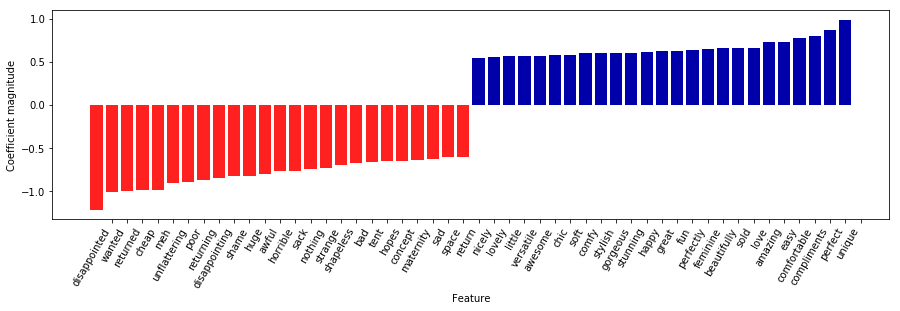

In [58]:
import matplotlib.pyplot as plt


plr_coefs = plr.coef_
feature_names = vect.get_feature_names()


visualize_coefficients(plr_coefs, feature_names, n_top_features=25)